# pill 7 -  Kernel methods

Remember the setting in which we are. The problem in machine learning could be regarded as finding $f$ such that 

$$
	f^*=\underset{f\in \mathcal{H}}{\operatorname{arg\,min}}\frac{1}{n}\sum_i{\mathcal{L}(f(x_i),y_i)}+\Omega(f)
	$$	
    
where this problem balances the **fit to the data** and the **complexity penalty**.

We have seen that following Occam's razor is a good idea in terms of controlling overfitting: "simpler" hypotheses are better. In this case $\Omega(f)$} incorporates our simplicity assumptions. And, if we fail with the complexity penalty we still have $\lambda$ (fixed by validation).

The intuition tells us that complex functions "wiggle/oscillate" more. But...
**How do we measure the complexity/oscillation of a function?**


## Enter the Hilbert space!

+ Functional analysis is the branch of mathematics concerned with the study of spaces of functions.
+ In a nutshell, functions are seen as points in a vector space (usually of infinite dimension) on a domain $\mathcal{D}$.

<ul>
<li>$\mathcal{R}$ -- The space of functions from $\mathbb{R}$ to $\mathbb{R}.$</li>
<li>$C^n(\mathcal{D})$ -- The space of $n$ times differentiable functions on $\mathcal{D}$.</li>
<li>$L^1(\mathcal{D})$ -- The space of all absolutely integrable functions on $\mathcal{D}$.
(i.e. $\{f | \int_\mathcal{D} |f(x)| dx < \infty $)</li>
<li>$L^2(\mathcal{D})$ -- The space of all square integrable functions on $\mathcal{D}$. (i.e. $\{f | \int_\mathcal{D} |f(x)|^2 dx < \infty $)</li>
</ul>

All these spaces form a vector space over $\mathbb{R}$. Let $f,g \in \mathcal{R}$. The basic axioms of the vector space are the well known:
<ul>
<li>$(f+g)(x)=f(x)+g(x), \forall x\in \mathbb{R}$}</li>
<li>$(\alpha f)( x)=\alpha f(x), \forall x \in \mathbb{R}$</li>
</ul>

**"Not very serious" definition of functional**
A functional is a function that takes one or more functions as arguments, and which returns a scalar value. 

Concepts of linear algebra such as *norm* and *inner product* can be defined for functions in function spaces.

**Normed vector space.**
A normed vector space is a pair $(V, \|\cdot\|)$ where $V$ is a vector space and $\|\cdot\|$ is the associated norm, satisfying the following properties for all $u, v \in V$ :
<ul>
<li> $\|v\| \geq 0$</li>
<li> $\|u + v\| \leq \|u\|+\|v\|$ (triangle inequality)</li>
<li> $\| |\alpha| v \|= |\alpha|\|v\|$ (positive homogeneity) </li>
<li> $\|v\|=0 \iff v=0$ </li>
</ul>

**Inner product space**

An real inner product space is a pair $(V,\langle \cdot,\cdot\rangle)$, where V is a real vector space and $\langle\cdot,\cdot\rangle$ the associated inner product, satisfying the following properties for all $u, v, \in V$:
<ul>
<li> $\langle u,v\rangle = \langle v,u\rangle$ (symmetry)</li>

<li> $\langle\alpha u,v\rangle=\alpha \langle u,v\rangle, \quad \langle u,\alpha v\rangle=\alpha \langle u,v\rangle$ (bilinearity)</li>

<li>$\langle u+v,w\rangle=\langle u,w\rangle+\langle v,w\rangle, \quad \langle u,v+w\rangle=\langle u,w\rangle+\langle v,w\rangle $ </li>

<li> $\langle u,u\rangle\geq 0 \quad \mbox{and}\quad \langle u,u\rangle=0 \iff u=0$</li>
</ul>

The inner product introduces a norm by setting $\|v\|=\langle v,v\rangle^{1/2}$ . Furthermore,
the Cauchy-Schwarz inequality holds in real inner product spaces.
$$
|\langle u,v \rangle|\leq \|u\|\|v\|
$$

A Hilbert space is an inner product space that is complete with
respect to the induced metric.

Note that a Hilbert space does not depen on functions. (i.e. $\mathbb{R}^n$ is a Hilbert space)
Intuitively, a space is complete if there are no "points missing" from it (inside or at the boundary). A space M is complete (or a Cauchy space) if every Cauchy sequence of points in M has a limit that is also in M or, alternatively, if every Cauchy sequence in M converges in M.

A linear evaluation functional over the *Hilbert space of functions* $\mathcal{H}$ is a linear functional $\mathcal{F}_x : \mathcal{H} \rightarrow \mathbb{R}$ that evaluates each function in the space at the point $x$, or 

$$
\mathcal{F}_x[f]=f(x)
$$

**Informal:** It is important to understand the difference between $f$ and $f(x)$. While $f$ represents the abstraction of a function, $f(x)$ corresponds to the evaluation of a function on a point $x$

A Hilbert space $\mathcal{H}$ is a *reproducing kernel Hilbert space*
(RKHS) if the evaluation functionals are bounded, i.e. if there exists a M such that
$$|\mathcal{F}_x[f]|=|f(x)|\leq M \|f\|_{\mathcal{H}} \forall f \in \mathcal{H}
$$


**Reproducing Kernel Hilbert Space
Property**
If $\mathcal{H}$ is a RKHS, then for each $x \in X$ there exists, by the
Riesz representation theorem a function $K_x$ of $\mathcal{H}$ (called
representer) with the reproducing property
$$
\mathcal{F}_x[f]=f(x)=\langle K_x, f\rangle=\langle K(x,\cdot ), f(\cdot) \rangle
$$



Observe that the evaluation of a funtion on a given point corresponds to the inner product between the function and the a Reproducing Kernel function evaluated at that point.

**The notion of complexity now can be defined in terms of the norm of a function in the Hilbert space**

Thus,
$$
	f^*=\underset{f\in \mathcal{H}}{\operatorname{arg\,min}}\frac{1}{n}\sum_i{\mathcal{L}(f(x_i),y_i)}+\lambda\|f\|_{\mathcal{H}}^2
	$$	


<div class="alert alert-info" style = "border-radius:10px">By the **representer's theorem** the optimal solution after solving the minimization of the former problem is given by:
	 $$
	 f^*(\cdot)=\sum_i{\alpha_i K(x_i,\cdot)}
	 $$

This is a remarkable fact because it converts the problem of looking for a generic function in an infinite-dimensional space into that of finding the optimal $\alpha_i\in \mathbb{R}$ in a finite dimensional space.</div>

**Sketch of proof**
Let $\mathcal{S}= span \{K(x_1,\cdot),\dots,K(x_n,\cdot)\}$ 
(Recall that this is the space spanned/generated by all linear combinations of the elements)

Claim: $f\in \mathcal{H}, f \perp \mathcal{S}$ if and only if $f(x_i)=0, \forall i$

Proof:
$f \perp \mathcal{S}$ if and only if $f$ is orthogonal to each $K(x_i,\cdot)$
i.e. $\langle f(\cdot),K(x_i,\cdot)\rangle_{\mathcal{H}}=0$

Considering the reproducing property the proof is clear $f(x_i)=\langle K(x_i,\cdot ), f(\cdot) \rangle_{\mathcal{H}}$

We can decompose the hypotheses space $\mathcal{H} = \mathcal{S}\bigoplus \mathcal{S}^{\perp}$
$$ f\in \mathcal{H}\qquad f=f_{\mathcal{S}}+f^{\perp}
$$


Claim:
$$f(x_i)=f_\mathcal{S}(x_i)$$
This is clear because of the claim in the former slide.


Claim:
$$\|f_\mathcal{S}\|_{\mathcal{H}}\leq\|f\|_{\mathcal{H}}$$
Proof:
Consider the triangle decomposition and remember that the $f^\perp$ and $f_\mathcal{S}$ are perpendicular (the cross term goes to zero), thus, 
$$\|f_{\mathcal{S}}\|^2_{\mathcal{H}}+\|f^{\perp}\|^2_\mathcal{H}=\|f\|^2_{\mathcal{H}}$$

**Remember:** We want to find $f^*$, that is the solution of the following minimization problem:	

$$f^*=\underset{f\in \mathcal{H}}{\operatorname{arg\,min}}\frac{1}{n}\sum_i{\mathcal{L}(f(x_i),y_i)}+\lambda\|f\|_{\mathcal{H}}^2$$	

In the RKHS the function evaluation $f(x_i)$ corresponds to $f_{\mathcal{S}}(x_i)$. Thus the loss does not change value.

$$f^*=\underset{f\in \mathcal{H}}{\operatorname{arg\,min}}\frac{1}{n}\sum_i{\mathcal{L}(f_{\mathcal{S}}(x_i),y_i)}+\lambda\|f\|_{\mathcal{H}}^2$$

What about the other term?

Recall the last claim, $\|f^*_\mathcal{S}\|_{\mathcal{H}}^2\leq\|f^*\|_{\mathcal{H}}^2$

Thus, $f$ spaned by the basis in S has smaller (or equal) norm that the optimal solution. 

In summary, the minimizer $f^*$ must lie in $\mathcal{S}$

Therefore 
$$ f^*(x)=\sum_i{\alpha_i K(x_i,x)}$$
Important algorithmic implications!


Let us write down the value of $\|f^*\|^2_\mathcal{H}$,
$$\|f^*\|^2_\mathcal{H}=\langle f^*,f^* \rangle_\mathcal{H}=\langle \sum_j{\alpha_j K(x_j,x)},\sum_l{\alpha_l K(x_l,x)} \rangle_\mathcal{H}
$$ by linearity
$$
 \sum_j \sum_l \alpha_l \alpha_j \langle K(x_j,x), K(x_l,x)\rangle_\mathcal{H}
$$
using the reproducing property, $f(x)=\langle K(x,\cdot ), f(\cdot) \rangle$,
$$
 \sum_j \sum_l \alpha_l \alpha_j K(x_j,x_l)
$$
or equivalently in matrix form ($K(j,l)=K(x_j,x_l)$)
$$
\|f^*\|^2_\mathcal{H}=\alpha^T K \alpha
$$

## Kernel regularized least squares

Let us take one of the measures used to evaluate the fitting goodness of the function $f(x_i)$ i.e. $\mathcal{L}(f(x_i),y_i)=(f(x_i)-y_i)^2$, then the problem to solve is

$$f^*=\underset{f\in \mathcal{H}}{\operatorname{arg\,min}}\frac{1}{n}\frac{1}{2}\sum_i(f(x_i)-y_i)^2 +\frac{1}{2}\lambda\|f\|_{\mathcal{H}}^2 $$

The solution of the problem is given by the Representer's theorem:
$f^*(x)=\sum_j{\alpha_j K(x_j,x)}$


$$
	f^*=\underset{f\in \mathcal{H}}{\operatorname{arg\,min}}\frac{1}{2}\sum_i{(f(x_i)-y_i)^2}+\frac{\lambda}{2}\|f\|_{\mathcal{H}}^2
	$$
	
Replacing the first term,

$$
	\alpha^*=\underset{\alpha_i \in \mathbb{R}}{\operatorname{arg\,min}}\frac{1}{2}\sum_i{(\sum_j{\alpha_j K(x_j,x_i)}-y_i)^2}+\frac{\lambda}{2}\|f\|_{\mathcal{H}}^2
	$$
	
replacing the norm and using the matrix form
$$
	\alpha^*=\underset{\alpha \in \mathbb{R}^N}{\operatorname{arg\,min}}\frac{1}{2} \|K\alpha -y\|^2+\frac{\lambda}{2}\alpha^TK\alpha
	$$

$$
	\alpha^*=\underset{\alpha \in \mathbb{R}^N}{\operatorname{arg\,min}}\frac{1}{2} ( K\alpha -y)^T( K\alpha -y)+\frac{\lambda}{2}\alpha^TK\alpha
	$$
	
Now we find the extrema by setting the gradient with respect to $\alpha$ to $0$
\begin{align*}
-K(K\alpha -y)+\lambda K\alpha = 0\\
(K+\lambda I)\alpha = y\\
\alpha = (K+\lambda I)^{-1}y
\end{align*}

Thus, the solution is just a matrix inversion $\mathcal{O}(n^3)$ and a matrix multiplication $\mathcal{O}(n^2)$ that depends on the number of samples $n$ .
The matrix $K + \lambda I$ is symmetric positive definite, so the appropriate algorithm is Cholesky factorization ( or SVD ).

RKHS needs the definition of a positive semidefinite kernel function $K$:
$$
\begin{align*}
{\bf linear}: &K(x_i,x_j)=x_i^Tx_j\\
{\bf polynomial:}&K(x_i,x_j)=(x_i^Tx_j+1)^d\\
{\bf gaussian:}&K(x_i,x_j)=exp\big( -\frac{\|x_i-x_j\|^2}{\sigma^2} \big)
\end{align*}$$

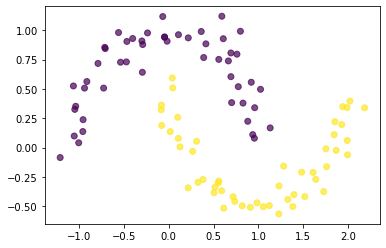

In [1]:
#example
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.datasets import make_moons

X,y=make_moons(noise = 0.1)

y = 2*y-1
%matplotlib inline
import matplotlib.pyplot as plt

plt.scatter(X[:, 0], X[:, 1], c=y,  alpha=0.7)

In [2]:
import numpy as np
from scipy.spatial import distance

def gaussian_kernel(xa,xb,gamma):
    d = distance.cdist(xa,xb,metric='euclidean')
    return np.exp(-d*gamma)

In [3]:
gamma = 1.
K = gaussian_kernel(X,X,gamma)
lamb = 1.
alpha = np.dot(np.linalg.inv(K+lamb*np.eye(K.shape[0])),y)

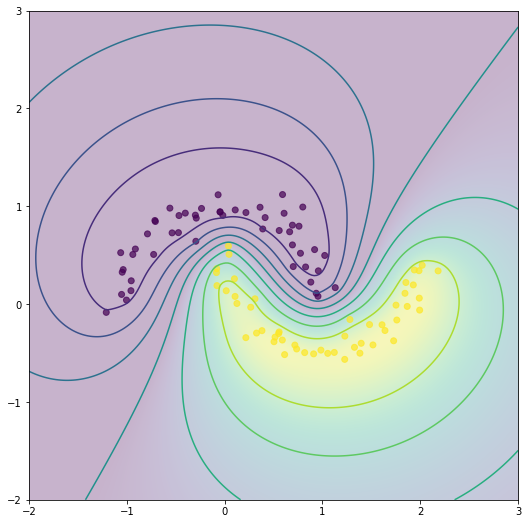

In [4]:
xx,yy = np.meshgrid(np.linspace(-2,3,200),np.linspace(-2,3,200))
viz=np.c_[xx.ravel(),yy.ravel()]


z = np.dot(gaussian_kernel(viz,X,1.),alpha)

plt.scatter(X[:, 0], X[:, 1], c=y,  alpha=0.7)
plt.gca().set_xlim([-2.,3.])
plt.gca().set_ylim([-2.,3.])
plt.imshow(z.reshape((200,200)), interpolation='bilinear', origin='lower', extent=(-2,3,-2,3),alpha=0.3, vmin=0, vmax=1)
plt.contour(xx,yy,z.reshape((200,200)))

plt.gcf().set_size_inches((9,9))

## But ... what are kernels?

The Gram matrix shows the degree of shared information among training samples.

Gram matrix interpretation
<ul>
<li> **Bad Kernel: ** Mostly diagonal $\implies$ most points are orthogonal to each other, no clusters, no structure. </li>
<li> **Good Kernel: ** The matrix has structure and show clusters.</li>
<li> **Ideal Kernel: ** ${\bf K_{\mbox{ideal}} = yy^T}$ </li>
</ul>

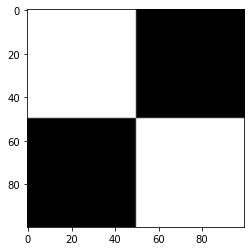

In [5]:
idx = np.argsort(y.ravel(),axis=0)
y_sort = y[idx, np.newaxis]
plt.imshow(np.dot(y_sort,y_sort.T),cmap="gray")

<div class = "alert alert-success" style = "border-radius:10px"> **EXERCISE: ** Check the Gram matrix for different values of $\gamma$. Look for a good value of $\gamma$ and check its performance.

</div>

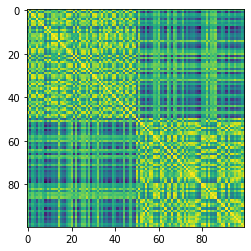

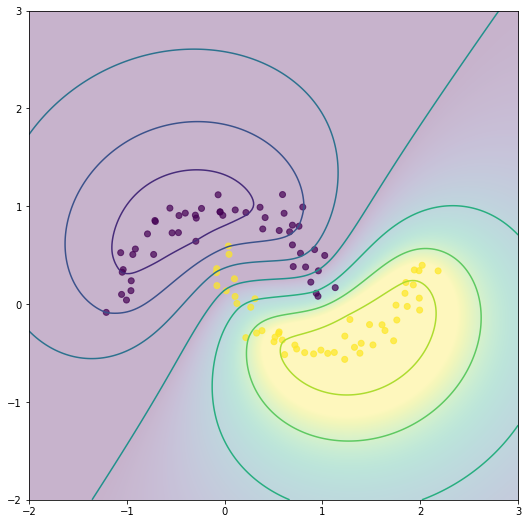

In [6]:
gamma = 1e-9

X_sort = X[idx,:]
K = gaussian_kernel(X_sort,X_sort,gamma)

plt.imshow(K,interpolation="nearest")

K = gaussian_kernel(X,X,gamma)
lamb = 10.
alpha = np.dot(np.linalg.inv(K+lamb*np.eye(K.shape[0])),y)
xx,yy = np.meshgrid(np.linspace(-2,3,200),np.linspace(-2,3,200))
viz=np.c_[xx.ravel(),yy.ravel()]


z = np.dot(gaussian_kernel(viz,X,1.),alpha)
plt.figure()
plt.scatter(X[:, 0], X[:, 1], c=y,  alpha=0.7)
plt.gca().set_xlim([-2.,3.])
plt.gca().set_ylim([-2.,3.])
plt.imshow(z.reshape((200,200)), interpolation='bilinear', origin='lower', extent=(-2,3,-2,3),alpha=0.3, vmin=0, vmax=1)
plt.contour(xx,yy,z.reshape((200,200)))

plt.gcf().set_size_inches((9,9))

<div class = "alert alert-success" style = "border-radius:10px"> **EXERCISE: ** What do we expect to happen when we increase $\lambda$? And decrease $\lambda$?
</div>

In [7]:
#your code

**Designing your own kernel:**

Using the properties of kernels:
Let $K_1$ and $K_2$ be valid Mercer's kernels, i.e. symmetric and positive definite matrices; and $\alpha>0$, then the following are also valid kernels
<ul>
<li> $K(x_i,x_j)=K_1(x_i,x_j)+K_2(x_i,x_j)$</li>
<li> $K(x_i,x_j)=K_1(x_i,x_j)\cdot K_2(x_i,x_j)$</li>
<li> $K(x_i,x_j)=\alpha K_1(x_i,x_j)$</li>
</ul>

**More ideas for designing your kernels**
<ul>
<li>Put your favorite distance $d(x_i,x_j)$ in $K(x_i,x_j)=e^{-d(x_i,x_j)}$. Done!</li>
<li> Take your favorite nonlinear transform $\Phi(x)$ and write</li>
$$K(x_i,x_j) = \Phi(x_i)^T\Phi(x_j)$$
</ul>


## The Kernel trick

Consider the Regularized Least Squares problem using a linear model. But, instead of the original input space consider a mapping $\phi({\bf x}):\mathbb{R}^d \rightarrow \mathbb{R}^{d'}$ of the data into another feature space.

The problem now is
$$
	{\bf \alpha}^*=\underset{\alpha}{\operatorname{arg\,min}}\frac{1}{2}\sum_i{(y_i - \alpha_i \phi(x_i))^2}+\frac{\lambda}{2}\|\alpha \|^2 = 
	$$
	
$$
= \underset{\alpha}{\operatorname{arg\,min}}\frac{1}{2}({\bf y} - \Phi\alpha)^T({\bf y} - \Phi\alpha ) +\frac{\lambda}{2} \alpha^T\alpha \implies
$$

$$
\implies \Phi^T \underset{\sigma}{\underbrace{({\bf y} - \Phi\alpha)}}  + \lambda \alpha = 0 \implies
$$
$$
\implies  \alpha = \frac{1}{\lambda} \Phi^T\sigma = \frac{1}{\lambda}\sum_{t=1}^N \sigma_t \phi({\bf x}_t)
$$
Observe that the optimal alpha lies in the span of the feature vectors corresponding to the training examples.


And the optimal $\sigma$ ? 
$$\sigma=({\bf y} - \Phi\alpha ) = ({\bf y} - \frac{1}{\lambda}\Phi\Phi^T\sigma)$$

$$ \sigma = (I + \frac{1}{\lambda}\Phi \Phi^T)^{-1} {\bf y} = (\Phi \Phi^T + \lambda I)^{-1} \lambda {\bf y} $$

and the prediction model becomes
$$ \hat{y} = \Phi \alpha = \frac{1}{\lambda}\Phi\Phi^T \sigma$$

Observe that this is the same solution as in the kernel method where the Gram matrix is the inner product matrix of the data set casted in the mapped space $K = \Phi\Phi^T$. Using kernels can be seen as mapping data in an arbitrarily high dimensional space defined by the Gram matrix.

**For example:** Consider the case of the polynomial quadratic kernel and assume ${\bf x}\in \mathbb{R}^2$: 
$$K({\bf x},{\bf x'})=({\bf x}^T{\bf x'}+1)^2 = $$
$$ = (1+ x_1x'_1 + x_2x'_2)^2=$$
$$1 + 2x_1x'_1 + 2x_2x'_2 + (x_1x'_1)^2+ (x_2x'_2)^2+ 2x_1x'_1x_2x'_2 \implies$$
$$\Phi({\bf x}) = [1,\sqrt{2}x_1,\sqrt{2}x_2,x_1^2,x_2^2,\sqrt{2}x_1x_2]^T \in \mathbb{R}^6$$

<ul>
<li> Using kernels can be seen as mapping data in an arbitrarily high dimensional space spanned by $\Phi(x)$. </li>
<li> The use of kernels allows a compact implicit description of the space generated by $\Phi(x)$ by means of the Gram matrix $K(x,\cdot) = \Phi(x)\Phi(\cdot)$. </li>
<li> Observe that $K\in \mathbb{R}^{N\times N}$. </li>
<li> The dimensionality of $\Phi(x)$ for a gaussian kernel is $\infty$.</li>
<ul>

In [8]:
from IPython.display import HTML 
HTML('<iframe width="560" height="315" src="https://www.youtube.com/embed/3liCbRZPrZA?rel=0&amp;controls=0&amp;showinfo=0" frameborder="0" allowfullscreen></iframe>')


C:\Users\blair\anaconda3\lib\site-packages\IPython\core\display.py:717: UserWarning: Consider using IPython.display.IFrame instead
  warnings.warn("Consider using IPython.display.IFrame instead")


## Moving beyond the kernel trick: Kernels in the primal

The kernel trick replaces any inner product $<x_i,x_j>$ by a kernel $<x_i,x_j> = K(x_i,x_j)$. Historically, this was the only way of using kernels until 2006, when Oliver Chapelle considered the RKHS. This allowed to use this notion outside of the inner product reformulation.

Remember that in the RKHS $f(x) = <K(x,\cdot),f(\cdot)>$ and that we can replace $f(x) = \sum_i \alpha_i k(x,x_i),$ $\quad \forall x_i \in \mathcal{D}_{train}$

Let us start by introducing a simple technique and change it to a kernel technique. 

### Another example: Online kernel perceptron

A **perceptron** is a linear model that solves in a very simple way the problem

$$
\begin{align}
\text{minimize}&\quad 1\\
\text{subject to}& \quad y_i(w^Tx_i) > 0
\end{align}
$$

Remember that his problem is not part of the disciplined convex optimization family since strict inequalities are not handled.

One way for solving this problem is to use **alternating projections**. This is, finding one violated constraint and project into the feasible set.

In this sense, the algorithm can be written as follows

<ol>
<li>Select a random training sample pair $(x_i,y_i)$</li>
<li>If $y_i(w^Tx_i)<0$ then $w_t \leftarrow w_{t-1} + \eta y_i x_i$ </li>
</ol>


In standard perceptron, $\eta = 1$.

In order to understand this algorithm let us consider what is the projection of a sample in the feasible set:
if $w_{t-1}$ does not satisfy the constraint, then we have to move in the direction of the normal of the hyperplane, $y_i x_i$ in order to get into the positive side, thus,  $w_t \leftarrow w_{t-1} + \eta y_i x_i$ is closer to satisfy the constraint.

Let us change this to accomodate kernels in the primal.

<div class = "alert alert-info">**Kernels in the primal vs dual**
</div>



Observe that $w = \sum_{i=1}^l \alpha_i {\bf x}_i$

With respect to $\alpha$ the perceptron update rule becomes:

$$\sum_{i=1}^{l+1} \alpha_i {\bf x}_i=\sum_{i=1}^l \alpha_i {\bf x}_i + y_i {\bf x}_i \implies \alpha_i \leftarrow \alpha_i +y_i$$

Thus we can rewrite the algorithm as

<ol>
<li>Select a random training sample pair $(x_i,y_i)$</li>
<li>If $y_i \sum_{k=1}^l \alpha_k \langle{\bf x}_k, {\bf x}_i \rangle < 0: \quad  \alpha_i \leftarrow\alpha_i +y_i$\\
</li>
</ol>

And the model becomes: $f(x) =\sum_{k=1}^l \alpha_k \langle{\bf x}_k, {\bf x}\rangle$ 

**Generalized algorithm: **
    
<ol>
<li>Select a random training sample pair $(x_i,y_i)$</li>
<li> If $y_i f({\bf x}_i) < 0: \quad  \alpha_i \leftarrow \alpha_i + y_i$</li>
</ol>

**Model: $f(x)$**


Remember that $f(x) = K({\bf X},x)^T\alpha$ in RKHS. Thus,
<ol>
<li>Select a random training sample pair $(x_i,y_i)$</li>
<li> If $y_i \sum\limits_{j=1}^N K(x_j,x_i) \alpha_j < 0: \quad  \alpha_i \leftarrow \alpha_i +y_i$</li>
</ol>


[-1  1]


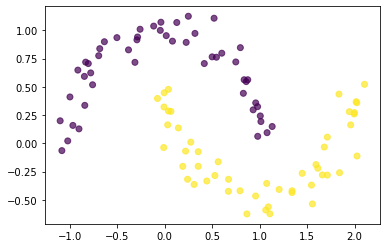

In [9]:
#example
import numpy as np
from sklearn.datasets import make_moons

X,y=make_moons(noise = 0.1)

y = 2*y-1
print (np.unique(y))
%matplotlib inline
import matplotlib.pyplot as plt

plt.scatter(X[:, 0], X[:, 1], c=y,  alpha=0.7)

In [10]:
import numpy as np
from scipy.spatial import distance

def gaussian_kernel(xa,xb,gamma):
    d = distance.cdist(xa,xb,metric='euclidean')
    return np.exp(-d*gamma)

gamma = 3.
K = gaussian_kernel(X,X,gamma)


We have to be carefull with the trivial solution in this case:

In [11]:
def train_perceptron(X,y,gamma,n_iters):
    alpha = np.random.rand(X.shape[0],1)
    for i in range(n_iters):
        idx = np.random.randint(X.shape[0])
        xi,yi = X[idx,:],y[idx]
        if yi*np.dot(gaussian_kernel(xi[np.newaxis,:],X,gamma),alpha)<0:
            alpha[idx] = alpha[idx]+yi
    return alpha

def test_perceptron(xtest,X,alpha,gamma):
    return np.dot(gaussian_kernel(xtest,X,gamma),alpha)


In [12]:
gamma = 2.

alpha = train_perceptron(X,y,gamma,10000)

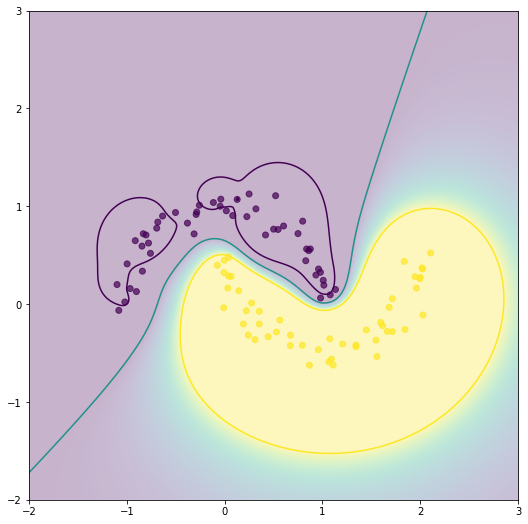

In [13]:
xx,yy = np.meshgrid(np.linspace(-2,3,200),np.linspace(-2,3,200))
viz=np.c_[xx.ravel(),yy.ravel()]

z = test_perceptron(viz,X,alpha,gamma)

plt.scatter(X[:, 0], X[:, 1], c=y,   alpha=0.7)
plt.gca().set_xlim([-2.,3.])
plt.gca().set_ylim([-2.,3.])
plt.imshow(z.reshape((200,200)), interpolation='bilinear', origin='lower', extent=(-2,3,-2,3),alpha=0.3, vmin=0, vmax=1)
plt.contour(xx,yy,z.reshape((200,200)),[-1,0,1])

plt.gcf().set_size_inches((9,9))

### Online kernel SVM

In a similar fashion we can extend support vector machines to the online case. 

In this case we are going to use subgradient methods. Remember that the support vector machine formulation is a follows,

$$
\begin{align}
\text{minimize}& \quad\|w\|_2^2+C\sum_i (1-y_i w^Tx_i)_+
\end{align}
$$

we now replace $f(x_i) = w^Tx_i$ by $f(x_i) = \alpha_i k(x_i,{\bf X})$

$$
\begin{align}
\text{minimize}& \quad\|{\bf \alpha}\|_2^2+C\sum_i (1-y_i {\bf \alpha}^T k(x_i,{\bf X}))_+
\end{align}
$$

and its gradient:

$$\nabla_{\alpha} F_{objective}= \left\{ \begin{align} 2\alpha - C y_i k(x_i,{\bf X}) & \quad \text{if} \; 1-y_i {\bf \alpha}^T k(x_i,{\bf X})\geq 0\\2\alpha &\quad \text{otherwise} \end{align}\right. 
$$




[-1  1]


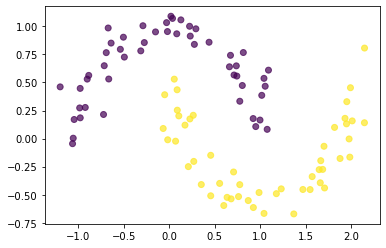

In [3]:
#example
from sklearn.datasets import make_moons

X,y=make_moons(noise = 0.1)

y = 2*y-1
print (np.unique(y))
%matplotlib inline
import matplotlib.pyplot as plt

plt.scatter(X[:, 0], X[:, 1], c=y,  alpha=0.7)

In [4]:
import numpy as np
from scipy.spatial import distance

def gaussian_kernel(xa,xb,gamma):
    d = distance.cdist(xa,xb,metric='euclidean')
    return np.exp(-d*gamma)

gamma = 2.
K = gaussian_kernel(X,X,gamma)


In [5]:
def train_svm(X,y,gamma,C,eta,n_iters):
    alpha = np.zeros((X.shape[0],1))
    for i in range(n_iters):
        idx = np.random.randint(X.shape[0])
        xi,yi = X[idx,:],y[idx]
        if yi*np.dot(gaussian_kernel(xi[np.newaxis,:],X,gamma),alpha)<=1.:
            g = 2*alpha - C*yi*gaussian_kernel(xi[np.newaxis,:],X,gamma).T
        else:
            g = 2*alpha 
        alpha = alpha - eta*g
    return alpha

def train_svm_stream(xi,yi,sv,gamma,alpha,C,eta,n_iters):   
    if yi*np.dot(gaussian_kernel(xi[np.newaxis,:],sv,gamma),alpha)<=1.:
        g = 2*alpha - C*yi*gaussian_kernel(xi[np.newaxis,:],sv,gamma).T
        alpha = alpha - eta*g    
        
        sv.append((xi,yi))
        alpha.append(yi)
    else:
        g = 2*alpha 
        alpha = alpha - eta*g
    return alpha,sv


def test_svm(xtest,X,alpha,gamma):
    return np.dot(gaussian_kernel(xtest,X,gamma),alpha)

In [6]:
gamma = 7.
C = 1.
eta = 0.01

alpha = train_svm(X,y,gamma,C,eta,10000)

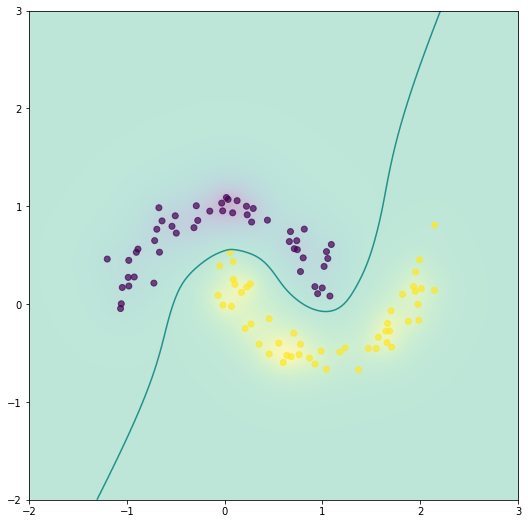

In [7]:
xx,yy = np.meshgrid(np.linspace(-2,3,200),np.linspace(-2,3,200))
viz=np.c_[xx.ravel(),yy.ravel()]

z = test_svm(viz,X,alpha,gamma)

plt.scatter(X[:, 0], X[:, 1], c=y,   alpha=0.7)
plt.gca().set_xlim([-2.,3.])
plt.gca().set_ylim([-2.,3.])
plt.imshow(z.reshape((200,200)), interpolation='bilinear', origin='lower', extent=(-2,3,-2,3),alpha=0.3)
plt.contour(xx,yy,z.reshape((200,200)),[-1,0,1])

plt.gcf().set_size_inches((9,9))

### The real online SVM

The former online version of SVM is not correct, though it is the most found formulation. The correct formulation replaces $\ell_2$ norm by the Hilbert norm as follows,


$$
\begin{align}
\text{minimize}& \quad\|f\|_\mathcal{H}^2+C\sum_i (1-y_i f(x_i))_+
\end{align}
$$

In [8]:
def train_svm(X,y,gamma,C,eta,n_iters):
    mom = 0.
    alpha = np.zeros((X.shape[0],1))
    K = gaussian_kernel(X,X,gamma)
    for i in range(n_iters):
        idx = np.random.randint(X.shape[0])
        xi,yi = X[idx,:],y[idx]
        if yi*np.dot(gaussian_kernel(xi[np.newaxis,:],X,gamma),alpha)<=1.:
            g = 2*np.dot(K,alpha) - C*yi*gaussian_kernel(xi[np.newaxis,:],X,gamma).T
        else:
            g = 2*np.dot(K,alpha) 
            
        mom = 0.9*mom - g
        alpha = alpha + eta*mom
    return alpha

def test_svm(xtest,X,alpha,gamma):
    return np.dot(gaussian_kernel(xtest,X,gamma),alpha)

In [9]:
gamma = 1e1
C = 1e-1
eta = 0.001

alpha = train_svm(X,y,gamma,C,eta,10000)

0.003794796137661937 -0.002528450369638154


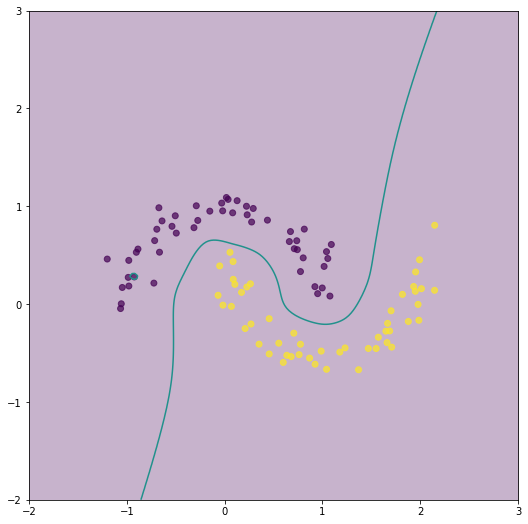

In [10]:
xx,yy = np.meshgrid(np.linspace(-2,3,200),np.linspace(-2,3,200))
viz=np.c_[xx.ravel(),yy.ravel()]

z = test_svm(viz,X,alpha,gamma)

plt.scatter(X[:, 0], X[:, 1], c=y,   alpha=0.7)
plt.gca().set_xlim([-2.,3.])
plt.gca().set_ylim([-2.,3.])
plt.imshow(z.reshape((200,200)), interpolation='bilinear', origin='lower', extent=(-2,3,-2,3),alpha=0.3, vmin=0, vmax=1)
plt.contour(xx,yy,z.reshape((200,200)),[-1,0,1])
print(z.max(),z.min())

plt.gcf().set_size_inches((9,9))

<div class="alert alert-danger" style = "border-radius:10px"> **DELIVERABLE: ** Implement a polynomial and linear kernel and check the result on a `moons` dataset and on `checkerboard`.</div>

In [271]:
def lineal_kernel(xa, xb):
    return np.matmul(xa, xb.T)

def polynomial_kernel(xa, xb, d, b):
    return np.power(lineal_kernel(xa,xb) + b, d)

def poly_kernel(xa,xb,d,b):
    return np.power(np.dot(xa,xb.T)+b,d)

def sigmoid_kernel(xa,xb,alpha,C):
    np.tanh(alpha*np.matmul(xa.T,xb)+C)

In [284]:
def lineal_kernel(xa, xb, gamma):
    return gamma*np.matmul(xa, xb.T)

def polynomial_kernel(xa, xb, gamma, d, b):
    return np.power(lineal_kernel(xa,xb,gamma) + b, d)

In [285]:
def train_svm(X,y,C,eta,n_iters,gamma,d,b):
    mom = 0.
    alpha = np.zeros((X.shape[0],1))
    K = polynomial_kernel(X,X,gamma,d,b)
    for i in range(n_iters):
        idx = np.random.randint(X.shape[0])
        xi,yi = X[idx,:],y[idx]
        if yi*np.dot(polynomial_kernel(xi[np.newaxis,:],X,gamma,d,b),alpha)<=1.:
            g = 2*np.dot(K,alpha) - C*yi*polynomial_kernel(xi[np.newaxis,:],X,gamma,d,b).T
        else:
            g = 2*np.dot(K,alpha) 
            
        mom = 0.9*mom - g
        alpha = alpha + eta*mom
    return alpha

def test_svm(xtest,X,alpha,gamma,d,b):
    return np.dot(polynomial_kernel(xtest,X,gamma,d,b),alpha)

In [294]:
gamma= 0.5
C = 12
eta = 0.0001

d=3
b = 1

alpha = train_svm(X,y,C,eta,10000,gamma,d,b)

58.778699520861664 -15.39892144506841


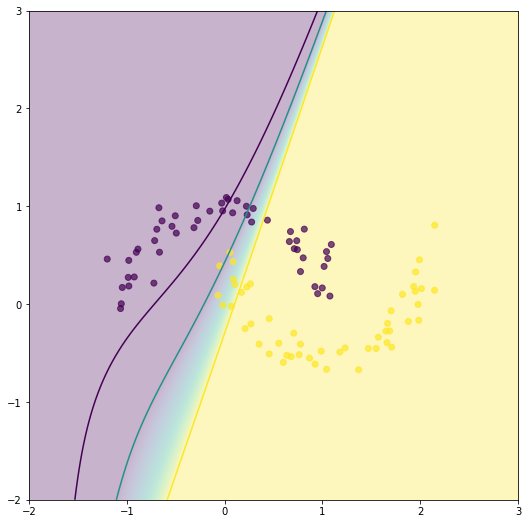

In [295]:
xx,yy = np.meshgrid(np.linspace(-2,3,200),np.linspace(-2,3,200))
viz=np.c_[xx.ravel(),yy.ravel()]

z = test_svm(viz,X,alpha,gamma,d,b)

plt.scatter(X[:, 0], X[:, 1], c=y,   alpha=0.7)
plt.gca().set_xlim([-2.,3.])
plt.gca().set_ylim([-2.,3.])
plt.imshow(z.reshape((200,200)), interpolation='bilinear', origin='lower', extent=(-2,3,-2,3),alpha=0.3, vmin=0, vmax=1)
plt.contour(xx,yy,z.reshape((200,200)),[-1,0,1])
print(z.max(),z.min())

plt.gcf().set_size_inches((9,9))